In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mglearn
%matplotlib inline

# Gradient Descent

w = w - myu * (de / dw)

e = (1 / N) * sigma((y_actual - y_pred)^2)

In [2]:
# case : define error function, dimension == 1
def error(w):
    return 0.1 * w ** 2 + w

In [3]:
def dedw(w):
    return 0.2 * w + 1

In [4]:
def num_dedw(w):
    h = 1.0e-4
    e1 = error(w+h)
    e2 = error(w-h)
    return (e1-e2) / (2 * h)

In [5]:
# -10에서 10까지 0.1만큼 차이 배열
w = np.arange(-10, 10, 0.1)

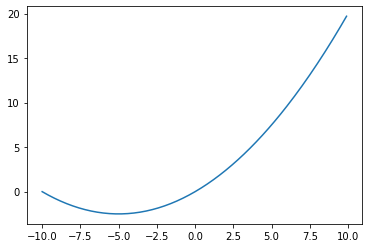

In [6]:
plt.plot(w, error(w))

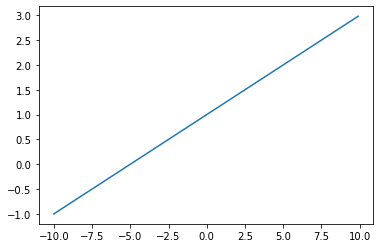

In [7]:
plt.plot(w, dedw(w))

In [8]:
# gradient Descent with dedu
w = 10
myu = 0.1
for i in range(1000):
    w_temp = w
    w = w - myu * dedw(w)
    if(abs(w - w_temp) < 1.0e-6):
        print('iter : {}, weight : {}, error : {}'.format(i, w, abs(w - w_temp)))
        break

iter : 625, weight : -4.999951736963476, error : 9.849599287292676e-07


In [9]:
# gradient Descent with num_dedu
w = 10
myu = 0.1
for i in range(1000):
    w_temp = w
    w = w - myu * num_dedw(w)
    if(abs(w - w_temp) < 1.0e-6):
        print('iter : {}, weight : {}, error : {}'.format(i, w, abs(w - w_temp)))
        break

iter : 625, weight : -4.999951736963734, error : 9.84959669381169e-07


# Multi-dimensional Case

In [10]:
def problem(x):
    return x[0]**2 + 2 * (x[1]-3)**2 - 10

In [11]:
def gradient(x):
    grad = np.zeros_like(x)
    grad[0] = 2 * x[0]
    grad[1] = 4 * (x[1] - 3)
    return grad

In [12]:
def num_gradient(function, x):
    h = 1.0e-4
    grad = np.zeros_like(x)
    x_temp = x.copy()
    
    for i in range(x.size):
        x_temp[i] = x[i] + h
        f1 = function(x_temp)
        
        # function에 들어가려면 x 전체로만 적용 가능
        # x[i]로 들어가면 error
        
        x_temp[i] = x[i] - h
        f2 = function(x_temp)
        grad[i] = (f1 - f2) / (2 * h)
        
    return grad

In [13]:
w = np.array([1.0, 1.0])
myu = 0.1
max_iter = 1000

for i in range(max_iter):
    w_temp = w
    w = w - myu * gradient(w)
    # feature가 2차원이기 때문에, np.sum으로 각각 error 계산 후 더하기
    error = np.sum((w - w_temp) ** 2)
    if(error < 1.0e-10):
        print('iter : {}, weight : {}, error : {}'.format(i, w, error))
        break

iter : 45, weight : [3.48449144e-05 3.00000000e+00], error : 7.588550360948265e-11


In [14]:
w = np.array([3.0, 2.0])
myu = 0.1
max_iter = 1000

for i in range(max_iter):
    w_temp = w
    w = w - myu * num_gradient(problem, w)
    error = np.sum((w - w_temp)** 2)
    if(error < 1.0e-10):
        print('iter : {}, weight : {}, error : {}'.format(i, w, error))
        break

iter : 50, weight : [3.42539453e-05 3.00000000e+00], error : 7.333329110849883e-11


# Mometum

In [15]:
def m_problem(x):
    return (x[0]-2)**2 + 2 * (x[1]-3)**2 + 3 * (x[2]-1)**2 - 4

In [16]:
alpha = 0.3
myu = 0.1
w = np.array([5.0, 5.0, 5.0])
error_criteria = 1.0e-6

w_old = w.copy()
for i in range(1000):
    w_temp = w
    w = w - myu * num_gradient(m_problem, w) + alpha * (w - w_old)
    w_old = w_temp
    error = np.sum((w - w_temp)**2)
    if(error < error_criteria):
        print('iter : {}, weight : {}, error : {}'.format(i, w, error))
        break

iter : 16, weight : [2.00147762 2.99992785 0.99991083], error : 9.667603761420394e-07
